In [60]:
import pandas as pd
import PIL
from pathlib import Path
import PIL.Image
import numpy as np
import os

image_dir = './archive/images';
class_dir = './archive/annotations';

label_map = {
    "trafficlight": 1,
    "stop": 2,
    "speedlimit": 3,
    "crosswalk": 4
}

label_maker_map = {
    1: [1, 0, 0, 0],
    2: [0, 1, 0, 0],
    3: [0, 0, 1, 0],
    4: [0, 0, 0, 1]
}

limit = 1000003;

In [61]:
def sorted_directory_listing_with_os_listdir(directory):
    items = os.listdir(directory)
    sorted_items = sorted(items)
    return sorted_items

In [62]:
images_dirs = sorted_directory_listing_with_os_listdir(image_dir);
classes_dirs = sorted_directory_listing_with_os_listdir(class_dir);

In [63]:
print(images_dirs)
print(classes_dirs)


['road0.png', 'road1.png', 'road10.png', 'road100.png', 'road101.png', 'road102.png', 'road103.png', 'road104.png', 'road105.png', 'road106.png', 'road107.png', 'road108.png', 'road109.png', 'road11.png', 'road110.png', 'road111.png', 'road112.png', 'road113.png', 'road114.png', 'road115.png', 'road116.png', 'road117.png', 'road118.png', 'road119.png', 'road12.png', 'road120.png', 'road121.png', 'road122.png', 'road123.png', 'road124.png', 'road125.png', 'road126.png', 'road127.png', 'road128.png', 'road129.png', 'road13.png', 'road130.png', 'road131.png', 'road132.png', 'road133.png', 'road134.png', 'road135.png', 'road136.png', 'road137.png', 'road138.png', 'road139.png', 'road14.png', 'road140.png', 'road141.png', 'road142.png', 'road143.png', 'road144.png', 'road145.png', 'road146.png', 'road147.png', 'road148.png', 'road149.png', 'road15.png', 'road150.png', 'road151.png', 'road152.png', 'road153.png', 'road154.png', 'road155.png', 'road156.png', 'road157.png', 'road158.png', 'roa

In [64]:

import PIL.Image

images = []
it = 0;

for path in images_dirs:
    if(it == limit): break;
    Path = image_dir + "/" + path;
    print(it);
    it += 1;
    # because path is object not string
    path_in_str = str(Path)
    print(path_in_str)

    img = PIL.Image.open(path_in_str);
    #img = img.resize((100, 125, 3));
    #print(img.info)
    print(np.array(img).shape);
    images.append(img);
    print(len(images));

print(len(images))


0
./archive/images/road0.png
(400, 267, 4)
1
1
./archive/images/road1.png
(283, 400, 4)
2
2
./archive/images/road10.png
(267, 400, 4)
3
3
./archive/images/road100.png
(385, 400, 4)
4
4
./archive/images/road101.png
(200, 400, 4)
5
5
./archive/images/road102.png
(267, 400, 4)
6
6
./archive/images/road103.png
(301, 400, 4)
7
7
./archive/images/road104.png
(364, 400, 4)
8
8
./archive/images/road105.png
(400, 300, 4)
9
9
./archive/images/road106.png
(400, 267, 4)
10
10
./archive/images/road107.png
(400, 320, 4)
11
11
./archive/images/road108.png
(246, 400, 4)
12
12
./archive/images/road109.png
(267, 400, 4)
13
13
./archive/images/road11.png
(300, 400, 4)
14
14
./archive/images/road110.png
(267, 400, 4)
15
15
./archive/images/road111.png
(267, 400, 4)
16
16
./archive/images/road112.png
(267, 400, 4)
17
17
./archive/images/road113.png
(274, 400, 4)
18
18
./archive/images/road114.png
(247, 400, 4)
19
19
./archive/images/road115.png
(225, 400, 4)
20
20
./archive/images/road116.png
(225, 400, 4)

In [65]:
labels = [];
from PIL import ImageDraw


it = 0;
for path in classes_dirs:
    if(it == limit): break;
    print(it);

    Path = class_dir + "/" + path;

    path_in_str = str(Path)
    print(path_in_str)
    # print(path_in_str)


    text = open(path_in_str, 'r');
    lines = text.readlines();

    labels.append(label_map[str(lines).split("<name>")[1].split("</name>")[0]]);

    x1 = int(str(lines).split("<xmin>")[1].split("</xmin>")[0])
    y1 = int(str(lines).split("<ymin>")[1].split("</ymin>")[0])
    x2 = int(str(lines).split("<xmax>")[1].split("</xmax>")[0])
    y2 = int(str(lines).split("<ymax>")[1].split("</ymax>")[0])

    print(x1, y1, x2, y2)

    img = images[it];


    #new_img = images[it].crop((x1, y1, x2, y2));
    draw = ImageDraw.Draw(img)

    draw.rectangle((x1, y1, x2, y2), outline='red', width=5)
    print(draw);

    img = img.resize((100, 100));

    images[it] = img

    #plt.imshow(new_img)

    it += 1;

print(labels)

0
./archive/annotations/road0.xml
98 62 208 232
1
./archive/annotations/road1.xml
154 63 258 281
2
./archive/annotations/road10.xml
106 3 244 263
3
./archive/annotations/road100.xml
35 5 363 326
4
./archive/annotations/road101.xml
195 7 392 194
5
./archive/annotations/road102.xml
37 38 243 245
6
./archive/annotations/road103.xml
89 25 297 272
7
./archive/annotations/road104.xml
48 14 344 345
8
./archive/annotations/road105.xml
27 146 281 377
9
./archive/annotations/road106.xml
101 150 163 226
10
./archive/annotations/road107.xml
90 37 233 232
11
./archive/annotations/road108.xml
174 128 186 139
12
./archive/annotations/road109.xml
243 120 276 150
13
./archive/annotations/road11.xml
188 98 207 132
14
./archive/annotations/road110.xml
196 10 377 181
15
./archive/annotations/road111.xml
35 92 101 159
16
./archive/annotations/road112.xml
137 12 272 152
17
./archive/annotations/road113.xml
171 38 307 186
18
./archive/annotations/road114.xml
254 32 319 102
19
./archive/annotations/road115.xm

In [66]:
print(images)

[<PIL.Image.Image image mode=RGBA size=100x100 at 0x3902748B0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34B3A1100>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x3902744C0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270D90>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34B0BFEB0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x3902743D0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34BA5D550>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390274760>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270DF0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34B458D90>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390274EB0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270B20>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34BB3D730>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390239DF0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270B50>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390

[<PIL.Image.Image image mode=RGBA size=100x100 at 0x3902748B0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34B3A1100>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x3902744C0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270D90>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34B0BFEB0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x3902743D0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34BA5D550>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390274760>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270DF0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34B458D90>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390274EB0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270B20>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34BB3D730>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390239DF0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270B50>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390

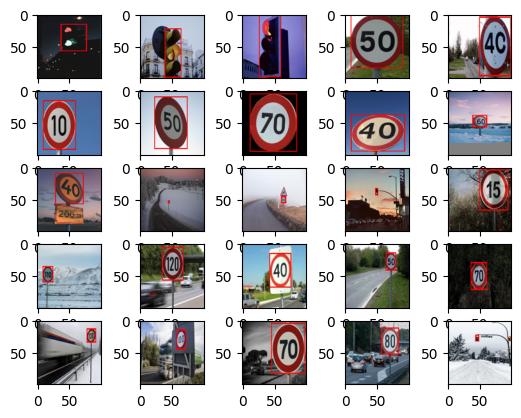

In [67]:
from matplotlib import pyplot as plt

f, pl = plt.subplots(5, 5);

print(images)

for i in range(25):
    pl[i // 5][i % 5].imshow(images[i]);

plt.show();

In [68]:
print(np.array(images));

[[[[ 22  21  27 255]
   [ 22  21  27 255]
   [ 22  21  27 255]
   ...
   [ 22  21  27 255]
   [ 22  21  27 255]
   [ 22  21  26 228]]

  [[ 22  21  27 255]
   [ 22  21  27 255]
   [ 22  21  27 255]
   ...
   [ 23  22  28 255]
   [ 23  22  27 255]
   [ 22  22  26 228]]

  [[ 22  21  27 255]
   [ 22  21  27 255]
   [ 22  21  27 255]
   ...
   [ 23  22  28 255]
   [ 23  22  28 255]
   [ 22  22  27 228]]

  ...

  [[ 21  21  21 255]
   [ 21  21  21 255]
   [ 21  21  21 255]
   ...
   [ 23  22  22 255]
   [ 22  22  22 255]
   [ 22  22  22 228]]

  [[ 21  21  21 255]
   [ 21  21  21 255]
   [ 22  22  22 255]
   ...
   [ 22  22  22 255]
   [ 22  22  22 255]
   [ 21  21  21 228]]

  [[ 21  21  21 255]
   [ 21  21  21 255]
   [ 21  21  21 255]
   ...
   [ 21  21  21 255]
   [ 21  21  21 255]
   [ 21  21  21 228]]]


 [[[178 191 212 217]
   [178 191 212 217]
   [178 191 212 217]
   ...
   [182 196 215 217]
   [182 196 215 217]
   [182 196 215 217]]

  [[181 194 216 255]
   [181 194 216 255]
   [

In [69]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
import keras

Y = np.array([]);

for l in labels:
    Y = np.append(Y, label_maker_map[l]);

Y = Y.reshape(-1, 4);
print(Y);

X = np.array(images);

#c = to_categorical(labels)
#Y = c[:,1:]
print(images)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=787)

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = Sequential()
model.add(Conv2D(128, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['acc'])


[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[<PIL.Image.Image image mode=RGBA size=100x100 at 0x3902748B0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34B3A1100>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x3902744C0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270D90>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34B0BFEB0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x3902743D0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34BA5D550>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390274760>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270DF0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34B458D90>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390274EB0>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390270B20>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x34BB3D730>, <PIL.Image.Image image mode=RGBA size=100x100 at 0x390239DF0>, <PIL.Image.Image imag

In [70]:
model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 781ms/step - acc: 0.6019 - loss: 4.1700 - val_acc: 0.7386 - val_loss: 0.9743
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 678ms/step - acc: 0.7153 - loss: 1.0005 - val_acc: 0.7386 - val_loss: 1.0242
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 664ms/step - acc: 0.7367 - loss: 0.8666 - val_acc: 0.7386 - val_loss: 1.0425
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 661ms/step - acc: 0.7425 - loss: 0.8710 - val_acc: 0.7386 - val_loss: 0.9892
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 669ms/step - acc: 0.7330 - loss: 0.9087 - val_acc: 0.7386 - val_loss: 0.8593
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 663ms/step - acc: 0.7234 - loss: 0.9098 - val_acc: 0.7386 - val_loss: 1.0651
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 666ms/step - acc: 0.7515 - loss: 0.8799 - val_acc: 0.7386 - val_loss: 0.8267
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 665ms/step - acc: 0.7320 - loss: 0.8537 - val_acc: 0.7386 - val_loss: 0.8330
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 668ms

In [71]:
from tensorflow.python.compiler.mlcompute import mlcompute
tf.compat.v1.disable_eager_execution()
mlcompute.set_mlc_device(device_name='gpu')
print("is_apple_mlc_enabled %s" % mlcompute.is_apple_mlc_enabled())
print("is_tf_compiled_with_apple_mlc %s" % #mlcompute.is_tf_compiled_with_apple_mlc())
print(f"eagerly? {tf.executing_eagerly()}")
print(tf.config.list_logical_devices())

SyntaxError: invalid syntax (2832682497.py, line 7)

In [ ]:
tf.config.list_physical_devices()



[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]